<a href="https://colab.research.google.com/github/GiX7000/deep-learning-with-tensorflow/blob/main/Part1.computer-vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning with TensorFlow with Laurence Moroney, Part1

## Example 1. Hello world NN

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

print(tf.__version__)

2.9.2


In [ ]:
# Build a simple Sequential model
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

In [ ]:
# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
# Declare model inputs and outputs for training
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [ ]:
# Train the model
model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 615ms/step - loss: 20.8206
Epoch 2/500
1/1 [==============================] - 0s 14ms/step - loss: 16.6510
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 13.3650
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 10.7743
Epoch 5/500
1/1 [==============================] - 0s 17ms/step - loss: 8.7308
Epoch 6/500
1/1 [==============================] - 0s 11ms/step - loss: 7.1178
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 5.8437
Epoch 8/500
1/1 [==============================] - 0s 11ms/step - loss: 4.8362
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 4.0387
Epoch 10/500
1/1 [==============================] - 0s 8ms/step - loss: 3.4065
Epoch 11/500
1/1 [==============================] - 0s 9ms/step - loss: 2.9044
Epoch 12/500
1/1 [==============================] - 0s 20ms/step - loss: 2.5047
Epoch 13/500
1/1 [=============================

In [ ]:
# Make a prediction
print(model.predict([10.0]))

1/1 [==============================] - 0s 102ms/step
[[18.980516]]


## Example 2. Housing Prices

Imagine that house pricing is as easy as:

A house has a base cost of 50k, and every additional bedroom adds a cost of 50k. This will make a 1 bedroom house cost 100k, a 2 bedroom house cost 150k etc. You will create a neural network that learns this relationship so that it would predict a 7 bedroom house as costing close to 400k etc.

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
def house_model():
    
    # Define input and output tensors with the values for houses with 1 up to 6 bedrooms
    # Hint: Remember to explictly set the dtype as float
    xs = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
    ys = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5], dtype=float)
    
    # Define your model (should be a model with 1 dense layer and 1 unit)
    model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
    
    # Compile your model
    # Set the optimizer to Stochastic Gradient Descent
    # and use Mean Squared Error as the loss function
    model.compile(optimizer='sgd', loss='mean_squared_error')
    
    # Train your model for 1000 epochs by feeding the i/o tensors
    model.fit(xs, ys, epochs=1000)
    
    return model

In [ ]:
# Get your trained model
model = house_model()

Epoch 1/1000
1/1 [==============================] - 0s 359ms/step - loss: 74.6425
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 34.5468
Epoch 3/1000
1/1 [==============================] - 0s 11ms/step - loss: 15.9893
Epoch 4/1000
1/1 [==============================] - 0s 5ms/step - loss: 7.4003
Epoch 5/1000
1/1 [==============================] - 0s 5ms/step - loss: 3.4251
Epoch 6/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.5852
Epoch 7/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.7337
Epoch 8/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.3396
Epoch 9/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1572
Epoch 10/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0728
Epoch 11/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0337
Epoch 12/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0156
Epoch 13/1000
1/1 [========================

In [ ]:
new_x = 7.0 # a house with 7 bedrooms
prediction = model.predict([new_x])
print(prediction)

1/1 [==============================] - 0s 115ms/step
[[4.0001397]]


## Example 3. Introduction to Computer Vision

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Let's print a training image (both as an image and a numpy array), and a training label to see.

LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

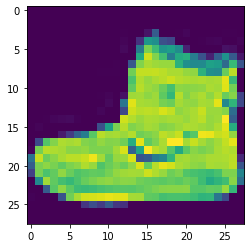

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

You'll notice that all of the values in the number are between 0 and 255. If you are training a neural network especially in image processing, for various reasons it will usually learn better if you scale all values to between 0 and 1. It's a process called normalization and fortunately in Python, it's easy to normalize an array without looping.

In [ ]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
# compile and train the model
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)


MODEL TRAINING:
Epoch 1/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.2037 - accuracy: 0.9234
Epoch 2/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.1864 - accuracy: 0.9302
Epoch 3/5
1875/1875 [==============================] - 79s 42ms/step - loss: 0.1698 - accuracy: 0.9356
Epoch 4/5
1875/1875 [==============================] - 72s 39ms/step - loss: 0.1555 - accuracy: 0.9415
Epoch 5/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.1417 - accuracy: 0.9472


In [ ]:
# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
model.evaluate(test_images, test_labels)


MODEL EVALUATION:
313/313 [==============================] - 6s 20ms/step - loss: 0.2690 - accuracy: 0.9098


[0.2689787745475769, 0.9097999930381775]

In [ ]:
# Predict
classifications = model.predict(test_images)

# take the first prediction of test images
print(classifications[0])

# take the first label of test images
print(test_labels[0])

313/313 [==============================] - 1s 2ms/step
[6.8927388e-06 6.2817001e-08 1.1233930e-05 4.3414019e-07 4.1667704e-06 2.0059600e-02 2.1061331e-05 2.0576596e-02 7.4807744e-05 9.5924515e-01]
9


As we can see, the prediction is a 10-dimensional vector representing the probability that this item is each of the 10 classes 

Let's try now to increase the number of neurons of the second layer to 1024.

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(2048, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.4728 - accuracy: 0.8294
Epoch 2/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3605 - accuracy: 0.8681
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3214 - accuracy: 0.8815
Epoch 4/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2987 - accuracy: 0.8896
Epoch 5/5
313/313 [==============================] - 3s 9ms/step
[2.8782879e-10 7.8061402e-10 4.4663093e-11 8.6780921e-12 5.3697418e-11 1.1459013e-04 9.3498931e-10 1.8949091e-02 1.4528651e-09 9.8093629e-01]
9


We observe that training takes longer, but the model now is more accurate.

If we add more layers to the model or train it for more or less epochs, what do you think the impact should be? Or train the model without normalize the input data? 

95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have Callbacks!

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.90): # Experiment with changing this value
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(2048, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])   # train until you reach 90% accuracy

Epoch 1/10
   6/1875 [..............................] - ETA: 6:55 - loss: 2.0790 - accuracy: 0.3229 

1875/1875 [==============================] - 46s 24ms/step - loss: 0.4687 - accuracy: 0.8320
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3608 - accuracy: 0.8668
Epoch 3/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.3202 - accuracy: 0.8826
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2954 - accuracy: 0.8903
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2804 - accuracy: 0.8945
Epoch 6/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.2660 - accuracy: 0.9020
Reached 90% accuracy so cancelling training!
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2659 - accuracy: 0.9021


In [ ]:
print(f"Your model was trained for {len(history.epoch)} epochs")

By having a callback at each end of the epoch, it is able to check the training parameters and compare if it meets the threshold you set in the function definition. In this case, it will simply stop when the accuracy reaches 0.60 after the current epoch.

## Example 4. Enhancing Computer Vision with ConvNets

We will use the same data as in example 3.

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 800)               0         
                                                                 
 dense_16 (Dense)            (None, 128)              

So, we have an improved accuracy here, instead of that one we had in the previous model without Conv2D-MaxPooling layers.

In [ ]:
# train until you reach 90% accuracy(using the same callback as in example 3)
history = model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.1187 - accuracy: 0.9554
Reached 90% accuracy so cancelling training!
1875/1875 [==============================] - 87s 46ms/step - loss: 0.1187 - accuracy: 0.9554


In [ ]:
print(f"Your model was trained for {len(history.epoch)} epochs")

Your model was trained for 1 epochs


Parameters for a ConvNet are: 1)the number of convolutions you want to generate(the value here is purely arbitrary but it's good to use powers of 2 starting from 32), 2)the size of the Convolution, in this case, a 3x3 grid, 3)the activation function to use(here is a ReLU, which you might recall is the equivalent of returning x when x>0, else return 0, and 4)in the first layer, the shape of the input data.

Try training for more epochs, eg for 20 -> Overfitting!

Visualizing the Convolutions and Pooling

In [ ]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


1/1 [==============================] - 0s 20ms/step


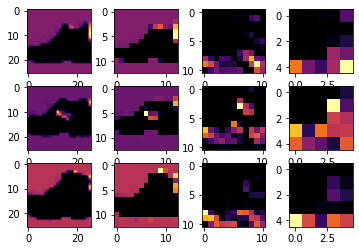

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

# let's take 3 images that are all shoes
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

Try editing the convolutions. Change the 32s to either 16 or 64. How about adding more Convolutions?

Exploring Convolutions

In [ ]:
from scipy import misc

# load the ascent image
ascent_image = misc.ascent()

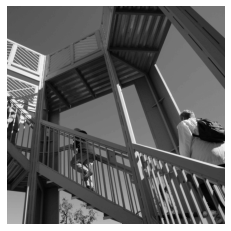

In [ ]:
import matplotlib.pyplot as plt

# Visualize the image
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_image)
plt.show()

In [ ]:
import numpy as np

# Copy image to a numpy array
image_transformed = np.copy(ascent_image)

# Get the dimensions of the image
size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]

In [ ]:
# Experiment with different values and see the effect
filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
# filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
# filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

Now you can create a convolution. You will iterate over the image, leaving a 1 pixel margin, and multiplying each of the neighbors of the current pixel by the value defined in the filter (i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter, etc.)

You'll then multiply the result by the weight, and then ensure the result is in the range 0-255.

Finally you'll load the new value into the transformed image.

In [ ]:
# Iterate over the image
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (ascent_image[x-1, y-1] * filter[0][0])
      convolution = convolution + (ascent_image[x-1, y] * filter[0][1])  
      convolution = convolution + (ascent_image[x-1, y+1] * filter[0][2])     
      convolution = convolution + (ascent_image[x, y-1] * filter[1][0])    
      convolution = convolution + (ascent_image[x, y] * filter[1][1])    
      convolution = convolution + (ascent_image[x, y+1] * filter[1][2])    
      convolution = convolution + (ascent_image[x+1, y-1] * filter[2][0])    
      convolution = convolution + (ascent_image[x+1, y] * filter[2][1])    
      convolution = convolution + (ascent_image[x+1, y+1] * filter[2][2])    
      
      # Multiply by weight
      convolution = convolution * weight   
      
      # Check the boundaries of the pixel values
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255

      # Load into the transformed image
      image_transformed[x, y] = convolution

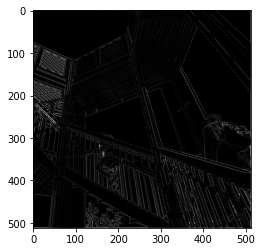

In [ ]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(image_transformed)
plt.show()   

The next cell will show a (2, 2) pooling. The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. It will take the largest of them and load it into the new image. Thus, the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!

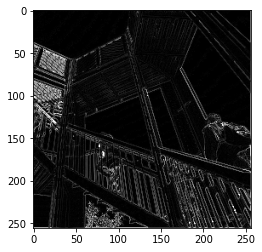

In [ ]:
# Assign dimensions half the size of the original image
new_x = int(size_x/2)
new_y = int(size_y/2)

# Create blank image with reduced dimensions
newImage = np.zeros((new_x, new_y))

# Iterate over the image
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    
    # Store all the pixel values in the (2,2) pool
    pixels = []
    pixels.append(image_transformed[x, y])
    pixels.append(image_transformed[x+1, y])
    pixels.append(image_transformed[x, y+1])
    pixels.append(image_transformed[x+1, y+1])

    # Get only the largest value and assign to the reduced image
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- it is now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show() 

## Example 5. Binary Classifier(Human-Horse) with real-world images

We will use the Horses or Humans dataset, use the ImageDataGenerator class to prepare it and build a binary classifier with conv2d and maxpooling layers.

In [ ]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

import zipfile
# Unzip training set
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

--2022-12-01 18:09:15--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.128, 172.217.193.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   195MB/s    in 0.7s    

2022-12-01 18:09:15 (195 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]

--2022-12-01 18:09:16--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.128, 172.217.193.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1148018

In [ ]:
# define the directories containing your images
import os

# Directory with training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')


# see what the filenames look like in these directories
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse31-0.png', 'horse49-7.png', 'horse50-8.png', 'horse13-1.png', 'horse31-4.png', 'horse21-7.png', 'horse17-4.png', 'horse17-2.png', 'horse50-9.png', 'horse18-1.png']
TRAIN SET HUMANS: ['human15-23.png', 'human11-09.png', 'human02-03.png', 'human17-00.png', 'human05-03.png', 'human02-28.png', 'human12-17.png', 'human08-13.png', 'human09-28.png', 'human01-18.png']
VAL SET HORSES: ['horse3-498.png', 'horse4-439.png', 'horse6-403.png', 'horse2-441.png', 'horse5-100.png', 'horse5-123.png', 'horse2-596.png', 'horse1-105.png', 'horse1-298.png', 'horse6-218.png']
VAL SET HUMANS: ['valhuman02-22.png', 'valhuman04-17.png', 'valhuman01-24.png', 'valhuman03-16.png', 'valhuman01-20.png', 'valhuman02-09.png', 'valhuman03-12.png', 'valhuman04-08.png', 'valhuman03-19.png', 'valhuman03-02.png']


In [ ]:
# total number of horse and human images in the directories
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


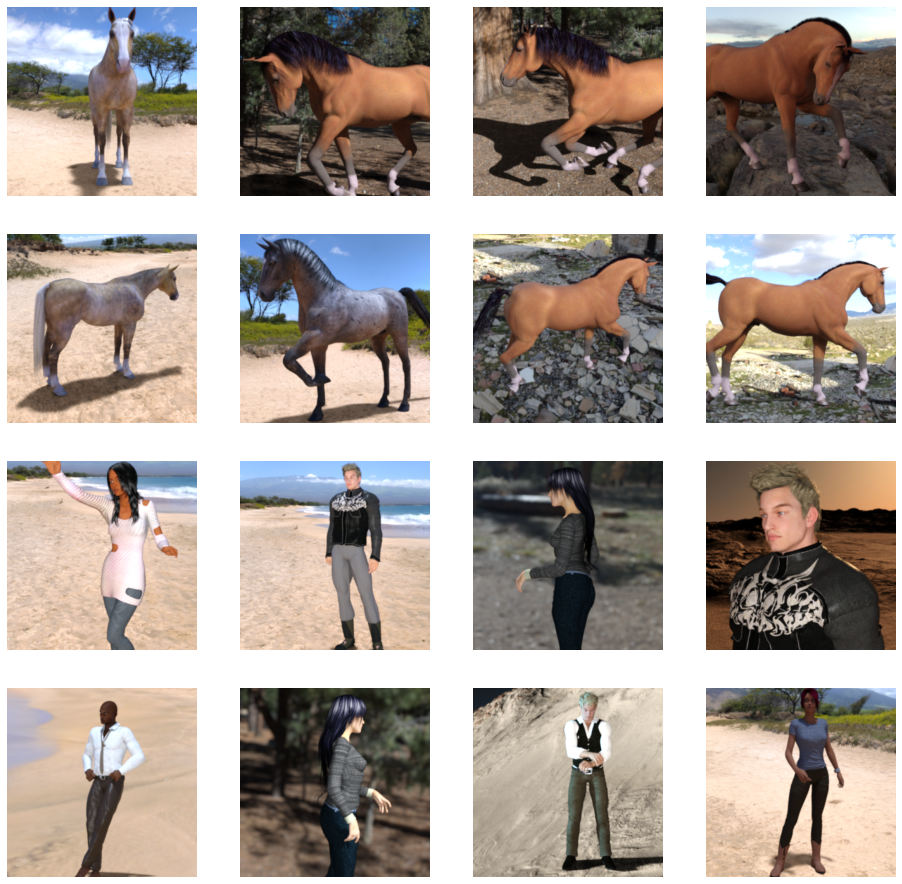

In [ ]:
# now, take a look at a few pictures to get a better sense of what they look like
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# display a batch of 8 horse and 8 human pictures
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

# stop training after reaching a 96% accuracy
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.96): # Experiment with changing this value
      print("\nReached 96% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

# define the model
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

# compile the model
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 35, 35, 64)      

In [ ]:
# Data Preprocessing: what we don't have is labels for all the images. we also need to normalize the values of the
# pixels=> all this job is done by ImageGenerator!!
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
# train the model
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      #verbose=1,   I don't like verbose!!
      validation_data = validation_generator,
      validation_steps=8,
      callbacks=[callbacks])

Epoch 1/15
8/8 [==============================] - 11s 901ms/step - loss: 0.8704 - accuracy: 0.5473 - val_loss: 0.6592 - val_accuracy: 0.8945
Epoch 2/15
8/8 [==============================] - 9s 1s/step - loss: 1.1679 - accuracy: 0.6997 - val_loss: 0.4925 - val_accuracy: 0.7578
Epoch 3/15
8/8 [==============================] - 8s 925ms/step - loss: 0.7962 - accuracy: 0.8087 - val_loss: 0.5560 - val_accuracy: 0.7227
Epoch 4/15
8/8 [==============================] - 8s 962ms/step - loss: 0.7123 - accuracy: 0.7130 - val_loss: 0.5185 - val_accuracy: 0.8477
Epoch 5/15
8/8 [==============================] - 7s 906ms/step - loss: 0.2424 - accuracy: 0.9210 - val_loss: 0.5456 - val_accuracy: 0.8867
Epoch 6/15
8/8 [==============================] - 8s 926ms/step - loss: 0.2489 - accuracy: 0.9077 - val_loss: 0.9913 - val_accuracy: 0.7891
Epoch 7/15
8/8 [==============================] - 8s 973ms/step - loss: 0.1944 - accuracy: 0.9238 - val_loss: 1.0499 - val_accuracy: 0.8320
Epoch 8/15
8/8 [======

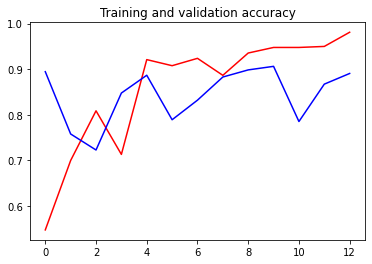

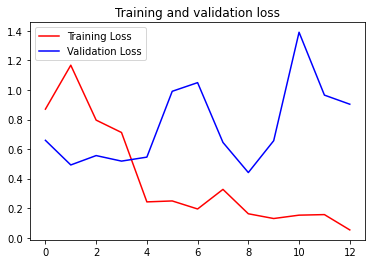

In [ ]:
# plot the results
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Flactuating curves means that validation and training distributions are not the same.

In [ ]:
# predict on unseen images
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  # bring the uploaded image to the appropriate input shape of the NN
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  print(f"This image has shape: {x.shape}")
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving horse@Voufras.jpg.jpeg to horse@Voufras.jpg.jpeg
This image has shape: (300, 300, 3)
1/1 [==============================] - 0s 233ms/step
[0.0004986]
horse@Voufras.jpg.jpeg is a horse


1/1 [==============================] - 0s 93ms/step


<ipython-input-30-7a817065727c>:46: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


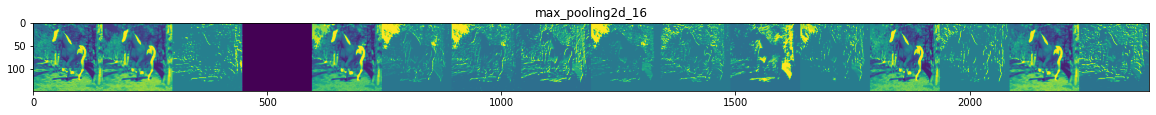

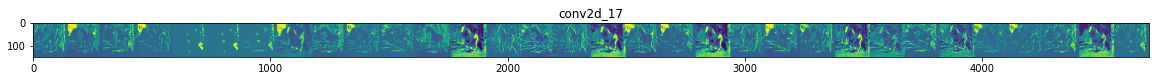

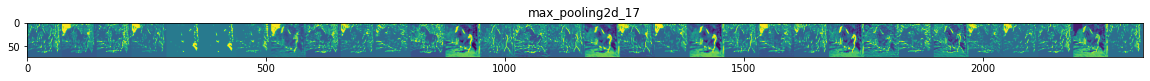

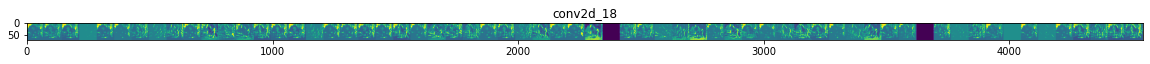

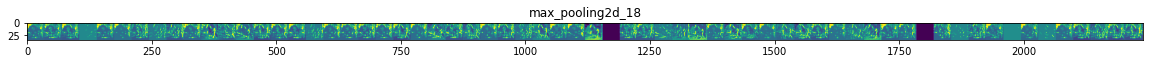

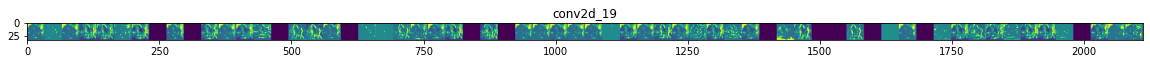

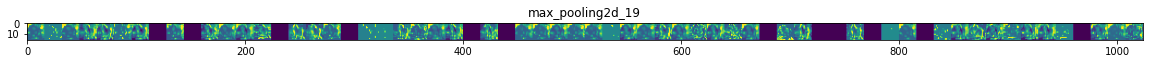

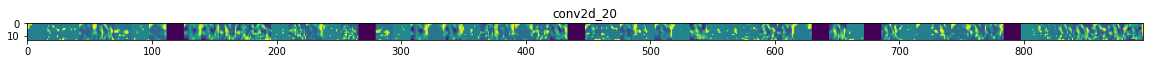

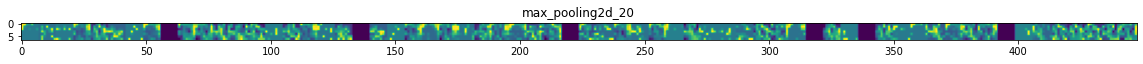

In [ ]:
# Visualizing Intermediate Representations
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

A useful technique in case you need to speed up your training or save compute resources is to compress the images in training. So, in the above example, change the target_size=(300, 300) to (150, 150) in generators and in the uploaded image for prediction. However, in this way, you may take a less accurate model.

## Example 6. Binary Classifier(Cats-Dogs) using data augmentation

In [ ]:
# get the data
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

# unzip the data
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

--2022-12-01 17:21:02--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 142.251.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   203MB/s    in 0.3s    

2022-12-01 17:21:02 (203 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



['cat.794.jpg', 'cat.748.jpg', 'cat.920.jpg', 'cat.739.jpg', 'cat.63.jpg', 'cat.480.jpg', 'cat.708.jpg', 'cat.938.jpg', 'cat.373.jpg', 'cat.53.jpg']
['dog.659.jpg', 'dog.884.jpg', 'dog.104.jpg', 'dog.226.jpg', 'dog.776.jpg', 'dog.901.jpg', 'dog.964.jpg', 'dog.720.jpg', 'dog.932.jpg', 'dog.265.jpg']
total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


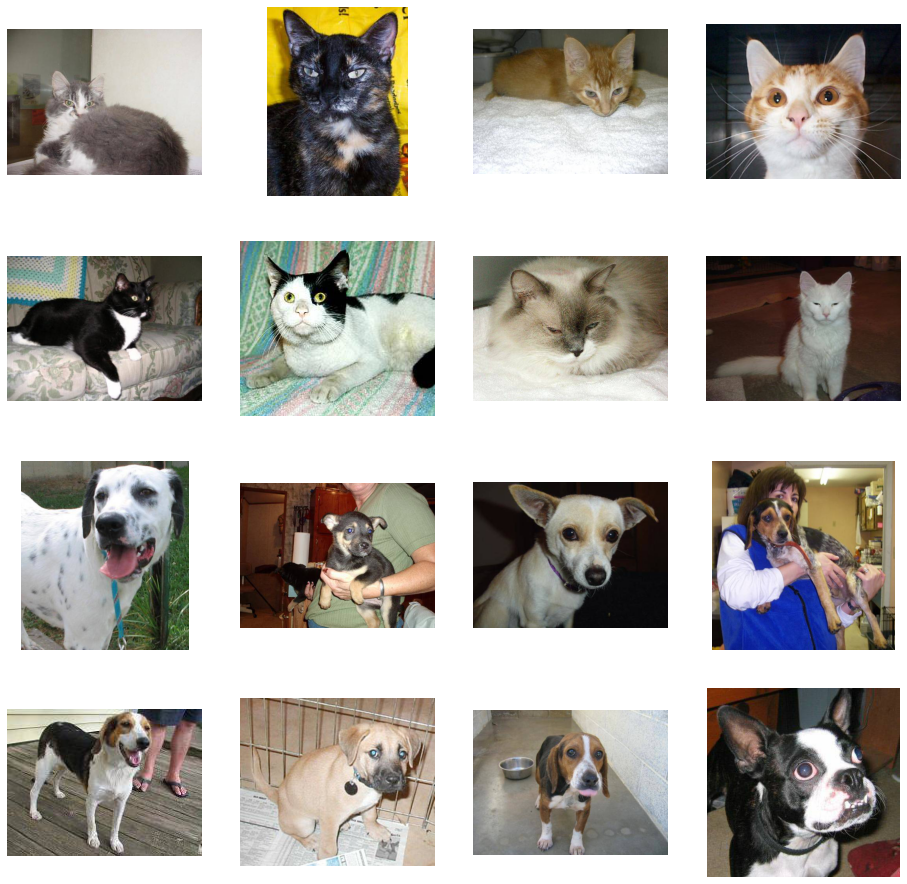

In [ ]:
# define directories as variables
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# how image names look like - take the images from file-directories and load them into python lists
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

# total number of images
print('total training cat images :', len(os.listdir(      train_cats_dir ) ))
print('total training dog images :', len(os.listdir(      train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

# let's take a look at a few pictures to get a better sense of what the cat and dog datasets look like
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
# define the model
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),    # here we compress input images at shape=(150, 150)
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model.summary()

# compile the model
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

# data preprocessing. we use generators to read the images from source files, convert them to float tensors, normalize their values
# and feed them into the network with their produced labels
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))

# train the model
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100,
                    epochs=15,
                    validation_steps=50)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/15
100/100 [==============================] - 22s 136ms/step - loss: 0.7503 - accuracy: 0.5480 - val_loss: 0.7066 - val_accuracy: 0.5490
Epoch 2/15
100/100 [==============================] - 14s 139ms/step - loss: 0.6384 - accuracy: 0.6595 - val_loss: 0.6098 - val_accuracy: 0.6770
Epoch 3/15
100/100 [==============================] - 15s 148ms/step - loss: 0.5681 - accuracy: 0.7150 - val_loss: 0.5810 - val_accuracy: 0.6890
Epoch 4/15
100/100 [==============================] - 13s 129ms/step - loss: 0.4549 - accuracy: 0.7930 - val_loss: 0.5855 - val_accuracy: 0.7030
Epoch 5/15
100/100 [==============================] - 16s 160ms/step - loss: 0.3795 - accuracy: 0.8260 - val_loss: 0.6187 - val_accuracy: 0.7260
Epoch 6/15
100/100 [==============================] - 10s 98ms/step - loss: 0.2955 - accuracy: 0.8740 - val_loss: 0.7013 - val_accuracy: 0.7180
Epoch 7/15
100/100 [==============================] - 12s 123ms/step - loss: 0.2146 - accuracy: 0.9175 - val_loss: 0.7170 - val_acc

<Figure size 432x288 with 0 Axes>

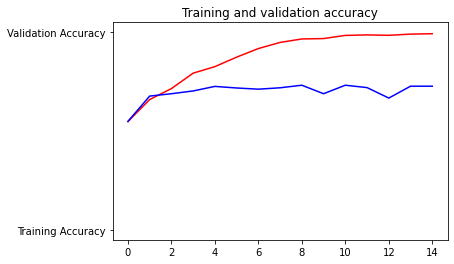

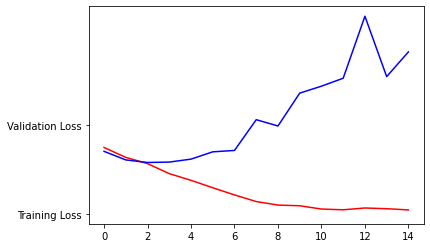

<Figure size 432x288 with 0 Axes>

In [ ]:
# get some evaluation by plotting the results
%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

The Training Accuracy is close to 100%, and the validation accuracy is in the 70%-80% range. This is a great example of overfitting -- which in short means that it can do very well with images it has seen before, but not so well with images it hasn't. Let's see if we can do better to avoid overfitting -- and one simple method is to augment the images a bit. If you think about it, most pictures of a cat are very similar -- the ears are at the top, then the eyes, then the mouth etc. Things like the distance between the eyes and ears will always be quite similar too.

What if we tweak with the images to change this up a bit -- rotate the image, squash it, etc. That's what image augementation is all about.

In [ ]:
# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# also update train_generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# and retrain the above same model with new train_generator
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Epoch 1/15
100/100 - 16s - loss: 0.5230 - accuracy: 0.7510 - val_loss: 0.5188 - val_accuracy: 0.7480 - 16s/epoch - 165ms/step
Epoch 2/15
100/100 - 18s - loss: 0.5342 - accuracy: 0.7470 - val_loss: 0.6624 - val_accuracy: 0.7310 - 18s/epoch - 182ms/step
Epoch 3/15
100/100 - 16s - loss: 0.5214 - accuracy: 0.7550 - val_loss: 0.4930 - val_accuracy: 0.7710 - 16s/epoch - 164ms/step
Epoch 4/15
100/100 - 17s - loss: 0.5467 - accuracy: 0.7330 - val_loss: 0.5458 - val_accuracy: 0.7430 - 17s/epoch - 165ms/step
Epoch 5/15
100/100 - 17s - loss: 0.5044 - accuracy: 0.7545 - val_loss: 0.5443 - val_accuracy: 0.7220 - 17s/epoch - 166ms/step
Epoch 6/15
100/100 - 17s - loss: 0.5209 - accuracy: 0.7485 - val_loss: 0.5074 - val_accuracy: 0.7620 - 17s/epoch - 166ms/step
Epoch 7/15
100/100 - 16s - loss: 0.5345 - accuracy: 0.7320 - val_loss: 0.5765 - val_accuracy: 0.7270 - 16s/epoch - 164ms/step
Epoch 8/15
100/100 - 17s - loss: 0.5100 - accuracy: 0.7615 - val_loss: 0.447

As we can see now, we took a better validation accuracy than the previous model.

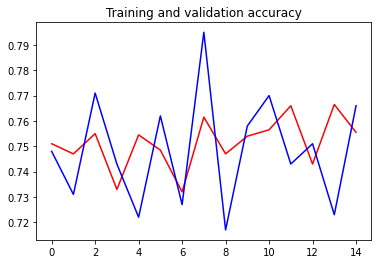

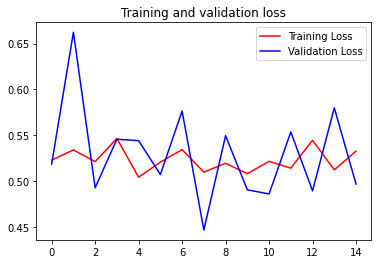

In [ ]:
# plotting the current results
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Apart from data augmentation, other things we can do to address overfitting is adding a dropout layer to our model or hyperparameter tuning, like adding more layers or more units, change the size of batch, and so on. Here is an example:

In [ ]:
# add a dropout layer and change the parameter of learning rate
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

# and retrain the above same model with new train_generator
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 17, 17, 128)     

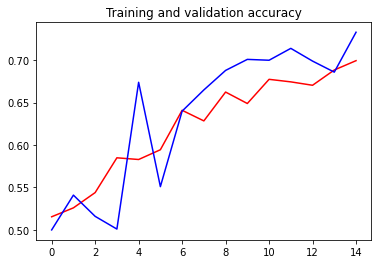

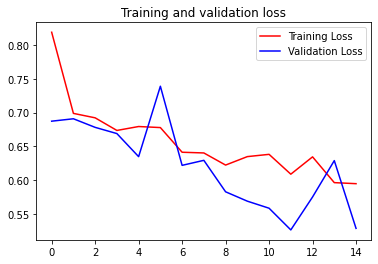

In [ ]:
# plotting the current results
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# upload some images and predict
import numpy as np
from google.colab import files
import keras.utils as image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")

Saving 10.jpg to 10 (1).jpg
1/1 [==============================] - 0s 222ms/step
[1.]
10.jpg is a dog


1/1 [==============================] - 0s 81ms/step


<ipython-input-18-94682dd68aae>:56: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


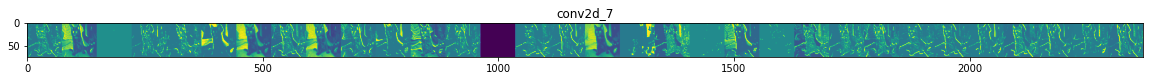

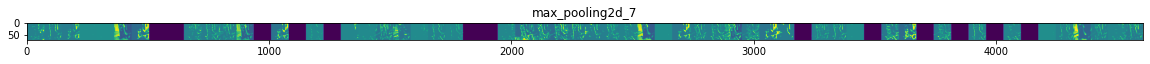

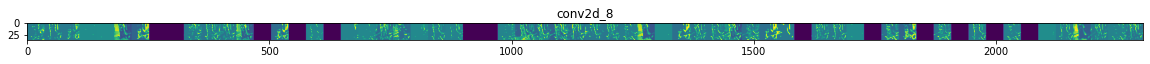

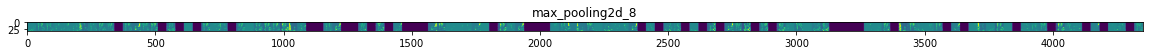

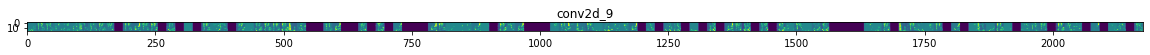

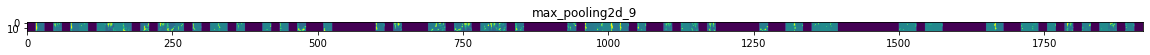

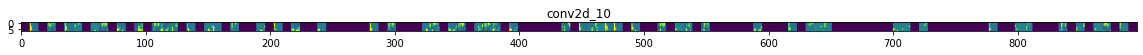

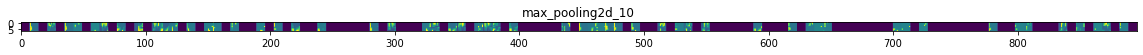

In [ ]:
# visualize intermediate activations
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

In [ ]:
# the history.pkl file contains the information of the training history of your model
def download_history():
  import pickle
  from google.colab import files

  with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

  files.download('history.pkl')

download_history()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Example 7. Binary Classifier(Cats-Dogs) using data augmentation, dropout and Transfer Learning

We will use the inception model

In [ ]:
# get a copy of the inception's pre-trained weights
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-12-01 18:27:45--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.139.128, 173.194.213.128, 173.194.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.139.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   149MB/s    in 0.6s    

2022-12-01 18:27:46 (149 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

# lock the weights of the layers in order not to be trainable here
for layer in pre_trained_model.layers:
  layer.trainable = False

# let's see how the pre-trained model looks like
pre_trained_model.summary()

# let's define the output of layer of the pre-trained model, and this will be the input of our classifier!!
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_21 (Conv2D)             (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_21[0][0]']              
 alization)                                                                                       
                                                                                       

In [ ]:
# check that all the layers in the model were set to be non-trainable
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [ ]:
# define our model
# the input of this model is last_output->the layer mixed7 we have defined above with a shape of (7, 7, 768)
from tensorflow.keras.optimizers import RMSprop

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


We will use the same data of cats and dogs, as in example 6, and we will also apply data augmentation.

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# train the model
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 20s - loss: 0.3464 - accuracy: 0.8635 - val_loss: 0.1395 - val_accuracy: 0.9440 - 20s/epoch - 195ms/step
Epoch 2/20
100/100 - 19s - loss: 0.2083 - accuracy: 0.9190 - val_loss: 0.0957 - val_accuracy: 0.9670 - 19s/epoch - 187ms/step
Epoch 3/20
100/100 - 24s - loss: 0.1860 - accuracy: 0.9295 - val_loss: 0.1700 - val_accuracy: 0.9480 - 24s/epoch - 240ms/step
Epoch 4/20
100/100 - 19s - loss: 0.1823 - accuracy: 0.9305 - val_loss: 0.1275 - val_accuracy: 0.9630 - 19s/epoch - 185ms/step
Epoch 5/20
100/100 - 18s - loss: 0.2002 - accuracy: 0.9340 - val_loss: 0.1236 - val_accuracy: 0.9570 - 18s/epoch - 182ms/step
Epoch 6/20
100/100 - 18s - loss: 0.2050 - accuracy: 0.9340 - val_loss: 0.0953 - val_accuracy: 0.9690 - 18s/epoch - 184ms/step
Epoch 7/20
100/100 - 20s - loss: 0.1798 - accuracy: 0.9405 - val_loss: 0.0935 - val_accuracy: 0.9700 - 20s/epoch - 197ms/step
Epoch 8/20
100/100 - 18s - loss: 0.1845 - accuracy: 0.9395 - val_loss: 0.1168 - val_accuracy: 0.9570 - 18s/epoch - 184

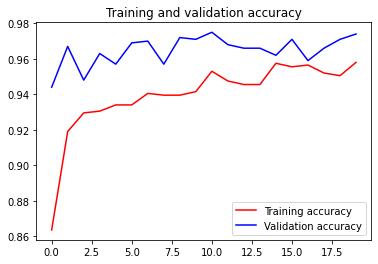

<Figure size 432x288 with 0 Axes>

In [ ]:
# plotting the results
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

We can see that the learning curves are in sync, a very good sign that we are avoiding overfitting.

## Example 8. Multi-Class Classification(Rock-Paper-Scissors)

We must do 3 technical changes to the above model: class_mode='categorical' to generators, activation='softmax' to output layer in model's definition, loss='categorical_crossentropy' when we compile the model.

In [ ]:
# get the data
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

# unzip the data
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

--2022-12-01 19:09:23--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.212.128, 173.194.214.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   137MB/s    in 1.4s    

2022-12-01 19:09:24 (137 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2022-12-01 19:09:25--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.212.128, 173.194.214.128, 173.194.215.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving t

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock07-k03-042.png', 'rock01-101.png', 'rock05ck01-025.png', 'rock04-081.png', 'rock05ck01-014.png', 'rock03-100.png', 'rock04-040.png', 'rock06ck02-079.png', 'rock07-k03-017.png', 'rock03-103.png']
['paper01-019.png', 'paper04-036.png', 'paper05-048.png', 'paper06-118.png', 'paper06-091.png', 'paper04-119.png', 'paper04-058.png', 'paper05-035.png', 'paper07-030.png', 'paper06-030.png']
['scissors04-073.png', 'scissors02-102.png', 'testscissors03-008.png', 'scissors02-016.png', 'scissors02-097.png', 'scissors03-061.png', 'scissors01-057.png', 'testscissors03-092.png', 'testscissors01-091.png', 'testscissors02-087.png']


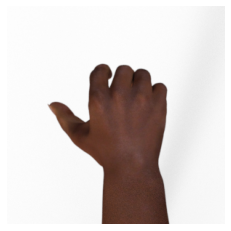

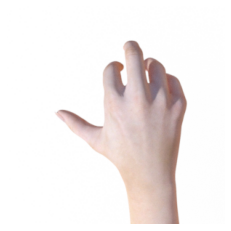

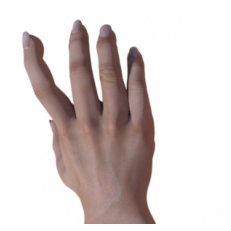

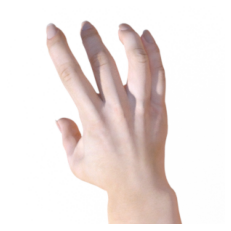

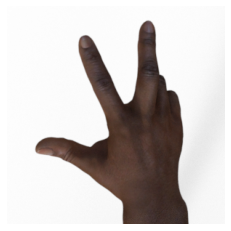

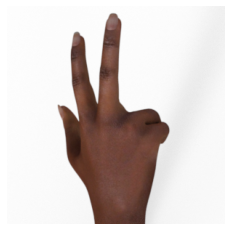

In [ ]:
# define directories
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])


# and plot some samples
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
# create training and validation generator, build and train the model
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),    # compress training images from (300, 300) to (150, 150)
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),      # compress training images from (300, 300) to (150, 150)
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_119 (Conv2D)         (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_120 (Conv2D)         (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_121 (Conv2D)         (None, 34, 34, 128)       73856     
                                     

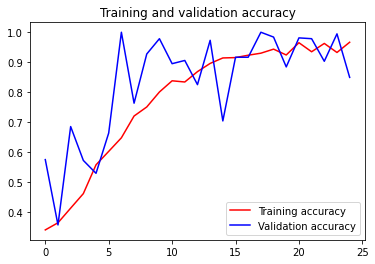

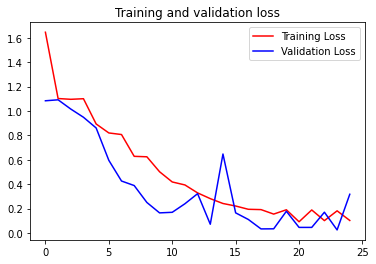

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# if you want open your camera, take a picture of your hand either as a rock or paper or scissor, upload and predict!
import numpy as np
from google.colab import files
import keras.utils as image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving paper2.png to paper2 (1).png
Saving rock4.png to rock4.png
Saving scissors2.png to scissors2.png
1/1 [==============================] - 0s 155ms/step
paper2.png
[[1. 0. 0.]]
1/1 [==============================] - 0s 16ms/step
rock4.png
[[0. 1. 0.]]
1/1 [==============================] - 0s 15ms/step
scissors2.png
[[0. 0. 1.]]
